## Welcome to Web_Scrapping Casestudy
- In this case study we will have to scrape weather data from the website  **"http://www.estesparkweather.net/archive_reports.php?date=200901"**
- We will 
- Scrape all the available attributes of weather data for each day from **2009-01-01 to 2018-10-28**
- Ignore records for missing days
- Represent the scraped data as **pandas dataframe** object.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re

In [2]:
#column names
# Average temperature	35.0°F
# Average humidity	37%
# Average dewpoint	10.8°F
# Average barometer	30.0 in.
# Average windspeed	15.1 mph
# Average gustspeed	17.8 mph
# Average direction	337° (NNW)
# Rainfall for month	0.00 in.
# Rainfall for year	9.33 in.
# Maximum rain per minute	0.00 in. on day 01 at time 00:00
# Maximum temperature	40.9°F on day 01 at time 15:07
# Minimum temperature	29.4°F on day 01 at time 07:24
# Maximum humidity	52% on day 01 at time 07:13
# Minimum humidity	27% on day 01 at time 17:15
# Maximum pressure	30.085 in. on day 01 at time 20:38
# Minimum pressure	29.589 in. on day 01 at time 01:53
# Maximum windspeed	34.5 mph on day 01 at time 17:22
# Maximum gust speed	44 mph from 315 °( NW) on day 01 at time 17:21
# Maximum heat index	40.9°F on day 01 at time 15:07



In [3]:

dates=[]
Average_temperature=[]
Average_humidity=[]
Average_dewpoint=[]
Average_barometer=[]
Average_windspeed=[]
Average_gustspeed=[]
Average_direction=[]
Rainfall_for_month=[]
Rainfall_for_year=[]
Maximum_rain_per_minute=[]
Maximum_temperature=[]
Minimum_temperature=[]
Maximum_humidity=[]
Minimum_humidity=[]
Maximum_pressure=[]
Minimum_pressure=[]
Maximum_windspeed=[]
Maximum_gust_speed=[]
Maximum_heat_index=[]

url_org="http://www.estesparkweather.net/archive_reports.php?date=20"

for i in range(9,19):
    x='{:02d}'.format(i)
    for j in range(1,13):
        y='{:02d}'.format(j)
        url=url_org+f"{x}{y}"
        resp = requests.get(url).text
        soup=BeautifulSoup(resp)
        odd_mon=["01","03","05","07","08","10","12"]
        even_mon=["02","04","06","09","11"]

        tables=soup.find("div",id="main-copy").findAll("table")
        
        if y in odd_mon:
            tables=tables[:31]
        elif (y == "02") & (x in ["12","16"]):
            tables=tables[:29]
        elif y == "02":
            tables=tables[:28]
        else:
            tables=tables[:30]


        for table in tables:
            tr=table.findAll("tr")
             
            day=tr[0].find("td").text.split(" ")[1]
            if day == "and":
                break
            day=int(day)
            day='{:02d}'.format(day)
            tr=tr[1:]
            rows=[]
            for row in tr:
                td=row.findAll("td")
                rows.append(td[1].text)
            dates.append("20{}-{}-{}".format(x,y,day))
            Average_temperature.append(rows[0])
            Average_humidity.append(rows[1])
            Average_dewpoint.append(rows[2])
            Average_barometer.append(rows[3])
            Average_windspeed.append(rows[4])
            Average_gustspeed.append(rows[5])
            Average_direction.append(rows[6])
            Rainfall_for_month.append(rows[7])
            Rainfall_for_year.append(rows[8])
            Maximum_rain_per_minute.append(rows[9])
            Maximum_temperature.append(rows[10])
            Minimum_temperature.append(rows[11])
            Maximum_humidity.append(rows[12])
            Minimum_humidity.append(rows[13])
            Maximum_pressure.append(rows[14])
            Minimum_pressure.append(rows[15])
            Maximum_windspeed.append(rows[16])
            Maximum_gust_speed.append(rows[17])
            Maximum_heat_index.append(rows[18])

            
Average_temperature=[float(re.search(r"[0-9]{1,2}\.[0-9]{1,2}",s).group()) for s in Average_temperature]
Average_humidity=[float(re.search(r"[0-9]{1,2}",s).group()) for s in Average_humidity]
Average_dewpoint=[float(re.search(r"-*[0-9]{1,2}\.[0-9]{1,2}",s).group()) for s in Average_dewpoint]
Average_barometer=[float(re.search(r"-*[0-9]{1,2}\.[0-9]{1,2}",s).group()) for s in Average_barometer]
Average_windspeed=[float(re.search(r"[0-9]{1,2}\.[0-9]{1,2}",s).group()) for s in Average_windspeed]
Average_gustspeed=[float(re.search(r"[0-9]{1,2}\.[0-9]{1,2}",s).group()) for s in Average_gustspeed]
Rainfall_for_month=[float(re.search(r"[0-9]{1,2}\.[0-9]{1,2}",s).group()) for s in Rainfall_for_month]
Rainfall_for_year=[float(re.search(r"[0-9]{1,2}\.[0-9]{1,2}",s).group()) for s in Rainfall_for_year]

Maximum_rain_per_minute=[float(re.search(r"[0-9]{1,2}\.[0-9]{1,2}",s).group()) for s in Maximum_rain_per_minute]
Maximum_temperature=[float(re.search(r"-*[0-9]{1,2}\.[0-9]{1,2}",s).group()) for s in Maximum_temperature]
Minimum_temperature=[float(re.search(r"-*[0-9]{1,2}\.[0-9]{1,2}",s).group()) for s in Minimum_temperature]
Maximum_humidity=[float(re.search(r"[0-9]{1,2}",s).group()) for s in Maximum_humidity]
Minimum_humidity=[float(re.search(r"[0-9]{1,2}",s).group()) for s in Minimum_humidity]
Maximum_pressure=[float(re.search(r"[0-9]{1,3}\.[0-9]{1,3}",s).group()) for s in Maximum_pressure]
Minimum_pressure=[float(re.search(r"[0-9]{1,3}\.[0-9]{1,3}",s).group()) for s in Minimum_pressure]
Maximum_windspeed=[float(re.search(r"[0-9]{1,2}\.[0-9]{1,2}",s).group()) for s in Maximum_windspeed]
Maximum_gust_speed=[float(re.search(r"[0-9]{1,3}\.*[0-9]{0,2}",s).group()) for s in Maximum_gust_speed]
Maximum_heat_index=[float(re.search(r"[0-9]{1,2}\.[0-9]{1,2}",s).group()) for s in Maximum_heat_index]

df=pd.DataFrame({
    'date':dates,
    'Average temperature (°F)':Average_temperature,
    'Average humidity (%)':Average_humidity,
    'Average dewpoint (°F)':Average_dewpoint, 
    'Average barometer (in)':Average_barometer,
    'Average windspeed (mph)':Average_windspeed, 
    'Average gustspeed (mph)':Average_gustspeed,
    'Average direction (°deg)':Average_direction,
    'Rainfall for month (in)':Rainfall_for_month,
    'Rainfall for year (in)':Rainfall_for_year, 
    'Maximum rain per minute':Maximum_rain_per_minute,
    'Maximum temperature (°F)':Maximum_temperature,
    'Minimum temperature (°F)':Minimum_temperature,
    'Maximum humidity (%)':Maximum_humidity,
    'Minimum humidity (%)':Minimum_humidity, 
    'Maximum pressure':Maximum_pressure,
    'Minimum pressure':Minimum_pressure, 
    'Maximum windspeed (mph)':Maximum_windspeed,
    'Maximum gust speed (mph)':Maximum_gust_speed,
    'Maximum heat index (°F)':Maximum_heat_index
})
df["date"]=pd.to_datetime(df["date"])
df.index=df["date"]
df.drop(["date"],axis=1,inplace=True)
df=df["2009-01-01":"2018-10-28"]
df['Average direction (°deg)']=[float(re.search(r"[0-9]{1,3}",s).group()) for s in df['Average direction (°deg)']]

In [6]:
# import pickle
# with open("Weather_data_pickle.pk","wb") as f:
#     pickle.dump(df,f)

In [8]:
import pickle
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [9]:
# import os
# os.chdir(r"C:\Users\shars\OneDrive\Desktop\python_workspace\dataset")

# with open("Weather_data_pickle.pk","rb") as f:
#     df=pickle.load(f)

In [11]:
df.head()

,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F)
date,,,,,,,,,,,,,,,,,,,
2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.00,0.00,0.00,40.1,34.5,44.0,27.0,29.762,29.596,41.4,59.0,40.1
2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.00,0.00,0.00,52.8,37.5,43.0,16.0,29.669,29.268,35.7,51.0,52.8
2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.00,0.00,0.00,41.2,6.7,89.0,35.0,30.232,29.260,25.3,38.0,41.2
2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.00,0.00,0.00,19.4,-0.0,79.0,35.0,30.566,30.227,12.7,20.0,32.0
2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.00,0.00,0.00,30.3,15.1,56.0,13.0,30.233,29.568,38.0,53.0,32.0
2009-01-06,24.8,42.0,4.6,29.8,16.0,23.9,276.0,0.00,0.00,0.00,29.5,19.7,57.0,27.0,29.879,29.637,29.9,48.0,32.0
2009-01-07,34.2,60.0,21.6,29.7,20.4,30.0,276.0,0.00,0.00,0.00,39.1,27.3,86.0,46.0,29.860,29.602,38.0,54.0,39.1
2009-01-08,42.1,41.0,20.0,29.8,17.5,25.2,265.0,0.00,0.00,0.00,51.3,36.9,53.0,28.0,29.883,29.627,35.7,49.0,51.3
2009-01-09,30.3,46.0,11.4,30.0,6.9,10.6,292.0,0.00,0.00,0.00,41.5,19.2,82.0,27.0,30.446,29.575,24.2,36.0,41.5


Text(0, 0.5, 'Speed (mph)')

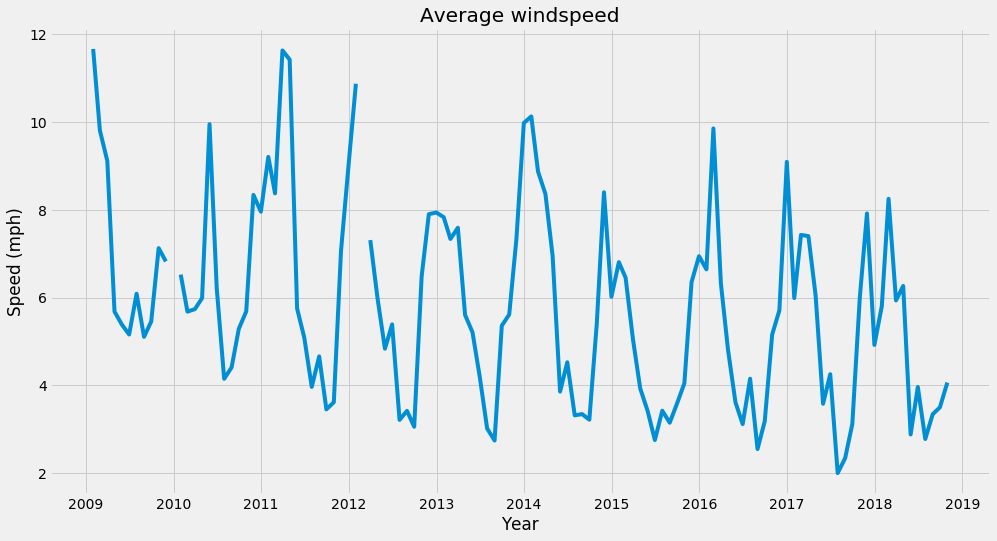

In [13]:
plt.style.use("fivethirtyeight")
fig=plt.figure(figsize=(15,8))
plt.plot(df.resample("M").mean().index,df["Average windspeed (mph)"].resample("M").mean())
plt.title("Average windspeed")
plt.xlabel("Year")
plt.ylabel("Speed (mph)")

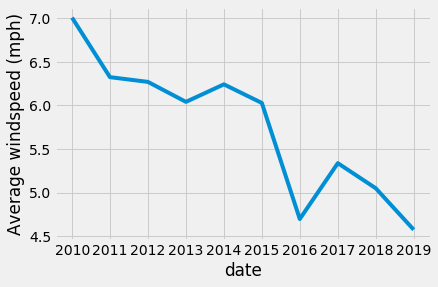

In [14]:
#group data by month
data=df.resample("Y").mean()
#for months - "M"
sns.lineplot(data.index,data["Average windspeed (mph)"])

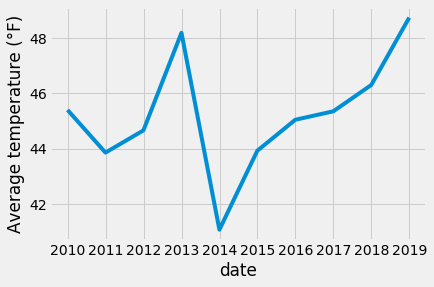

In [15]:
sns.lineplot(data.index,data["Average temperature (°F)"])

In [16]:
df["Average temperature (°C)"]=df["Average temperature (°F)"].apply(lambda x:(x - 32)*(5/9))

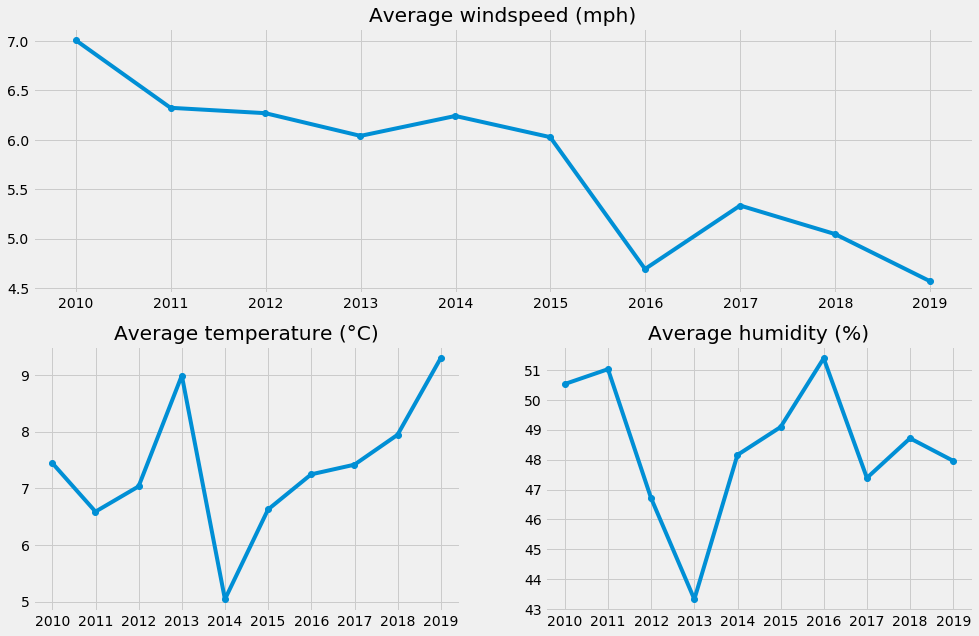

In [17]:
import matplotlib.gridspec as gridspec
# print(plt.style.available)
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(15,10))
gd = gridspec.GridSpec(2,2)

data=df.resample("Y").mean()

ax1=plt.subplot(gd[0,:],title="Average windspeed (mph)")
ax1.plot(data.index,data["Average windspeed (mph)"],marker="o")
ax2=plt.subplot(gd[1,0],title="Average temperature (°C)")
ax2.plot(data.index,data["Average temperature (°C)"],marker="o")
ax3=plt.subplot(gd[1,1],title="Average humidity (%)")
ax3.plot(data.index,data["Average humidity (%)"],marker="o")
plt.show()

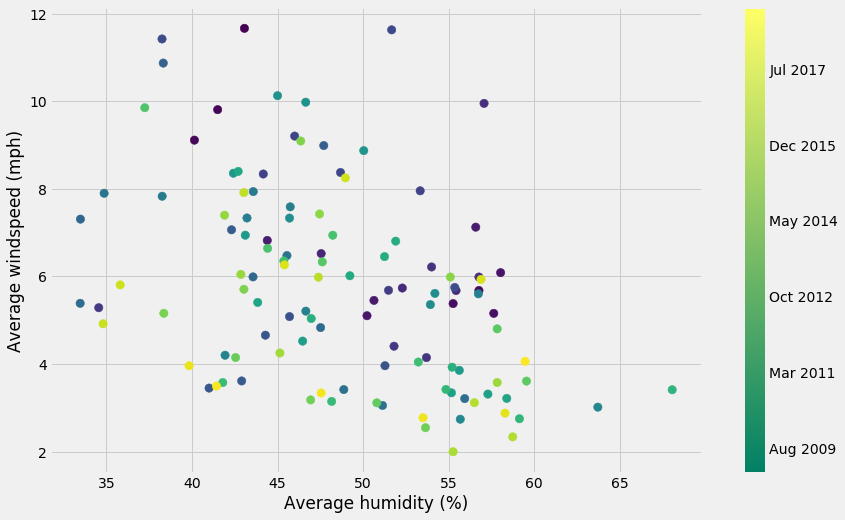

In [18]:
data=df.resample("M").mean()
fig=plt.figure(figsize=(13,8))
sm = plt.cm.ScalarMappable(cmap='summer', 
                           norm=plt.Normalize(vmin=data.index.min().value,
                                              vmax=data.index.max().value))
sm._A = []  
cbar = plt.colorbar(sm);
# Change the numeric ticks into ones that match the x-axis
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%b %Y'))
plt.scatter(data["Average humidity (%)"],data["Average windspeed (mph)"],c=data.index,s=70)
plt.xlabel("Average humidity (%)")
plt.ylabel("Average windspeed (mph)")
plt.show()
# Define your mappable for colorbar creation

# cbar=plt.colorbar()
# cbar.set_label("Year")


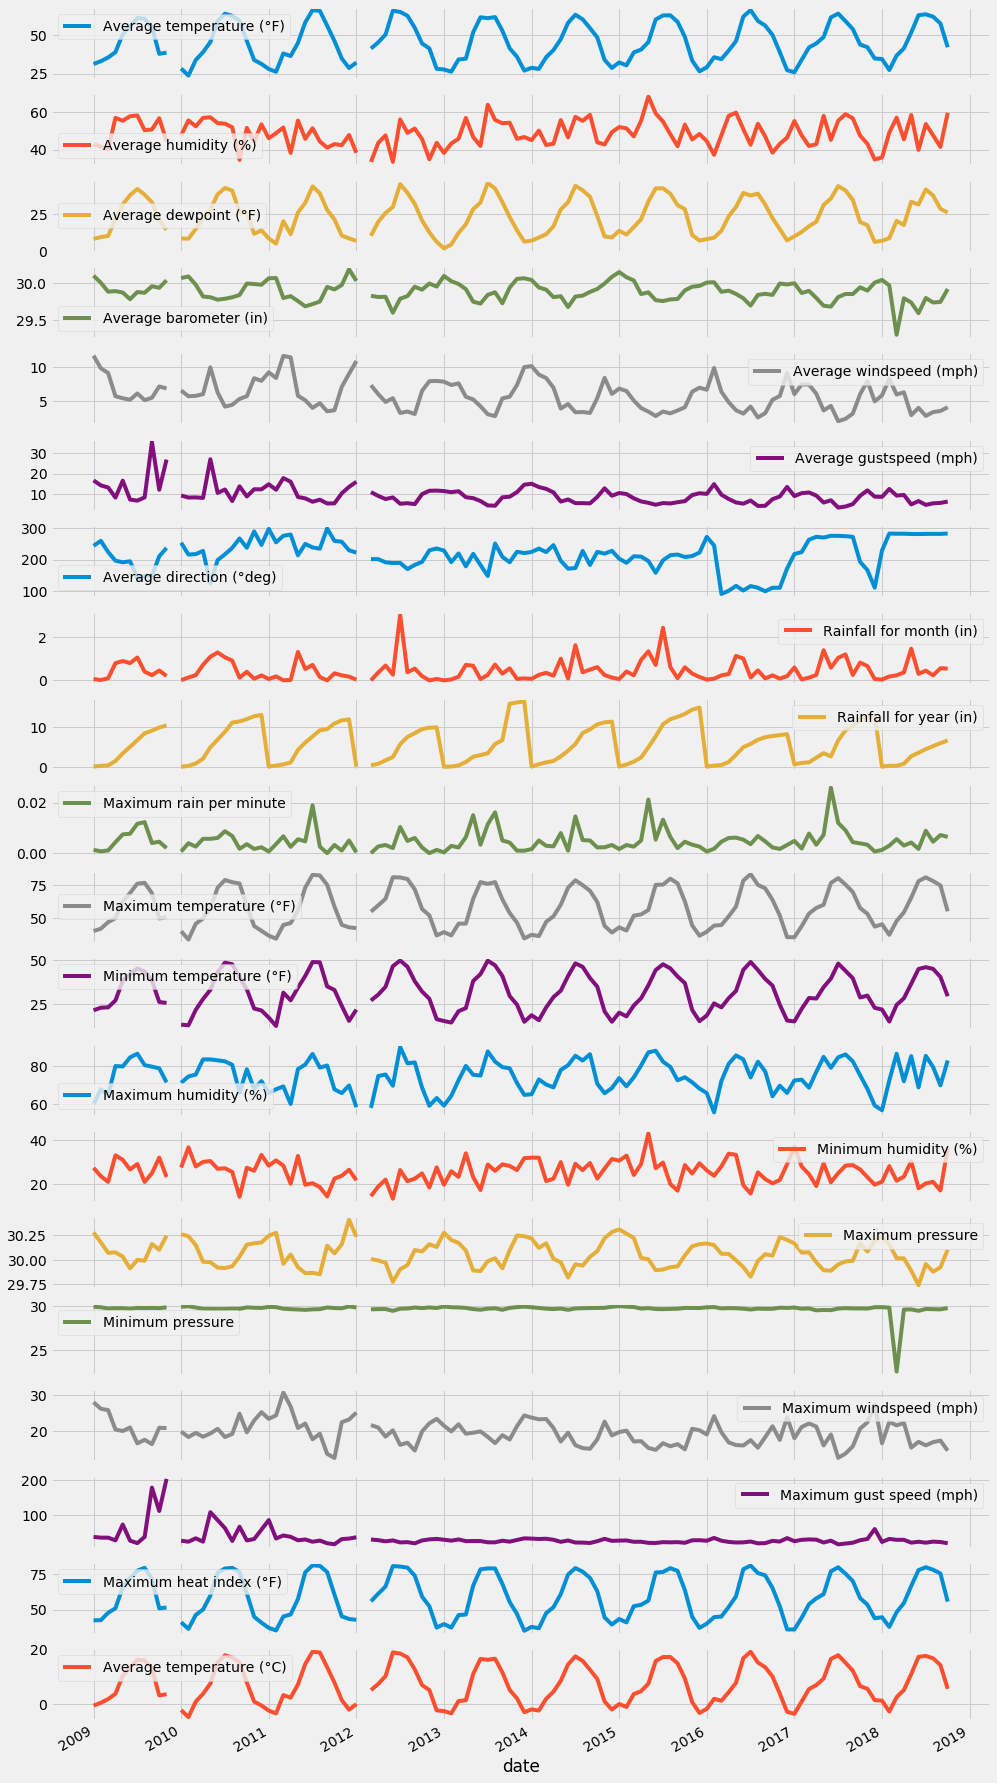

In [19]:
data.plot(subplots=True, figsize=(15, 35)); 
plt.legend(loc='best')
plt.show()

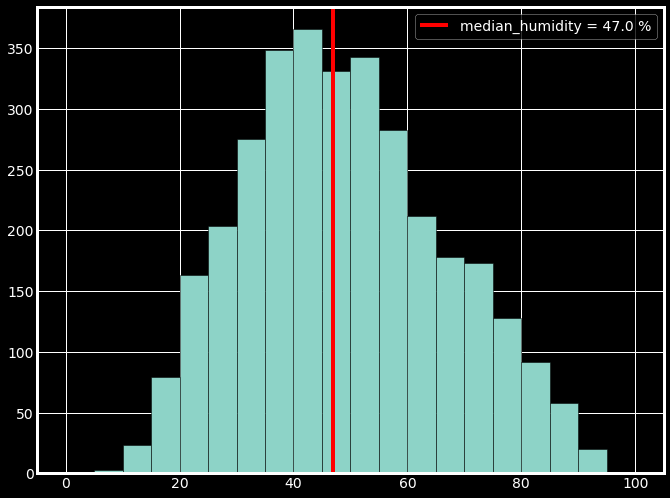

In [20]:
bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
plt.style.use("dark_background")
median = np.median(df["Average humidity (%)"])
_=plt.figure(figsize=(10,8))
plt.hist(df["Average humidity (%)"],bins=bins,edgecolor="black")
plt.style.use("dark_background")
plt.axvline(median,color="red",label="median_humidity = {} %".format(median))
plt.legend(loc="best")

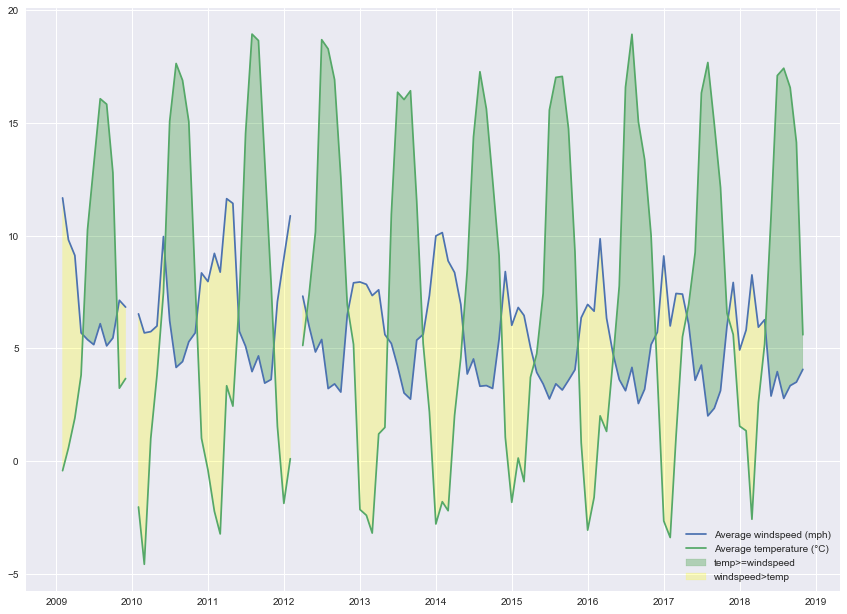

In [21]:
x=data["Average windspeed (mph)"]
y=data["Average temperature (°C)"]
plt.style.use("seaborn")
_=plt.figure(figsize=(13,10))
plt.plot(data.index,x,label="Average windspeed (mph)")
plt.plot(data.index,y,label="Average temperature (°C)")
plt.fill_between(data.index,x,y,where=(y>=x),color="green",interpolate=True,alpha=0.25,label="temp>=windspeed")
plt.fill_between(data.index,x,y,where=(x>y),color="yellow",interpolate=True,alpha=0.25,label="windspeed>temp")

plt.legend()

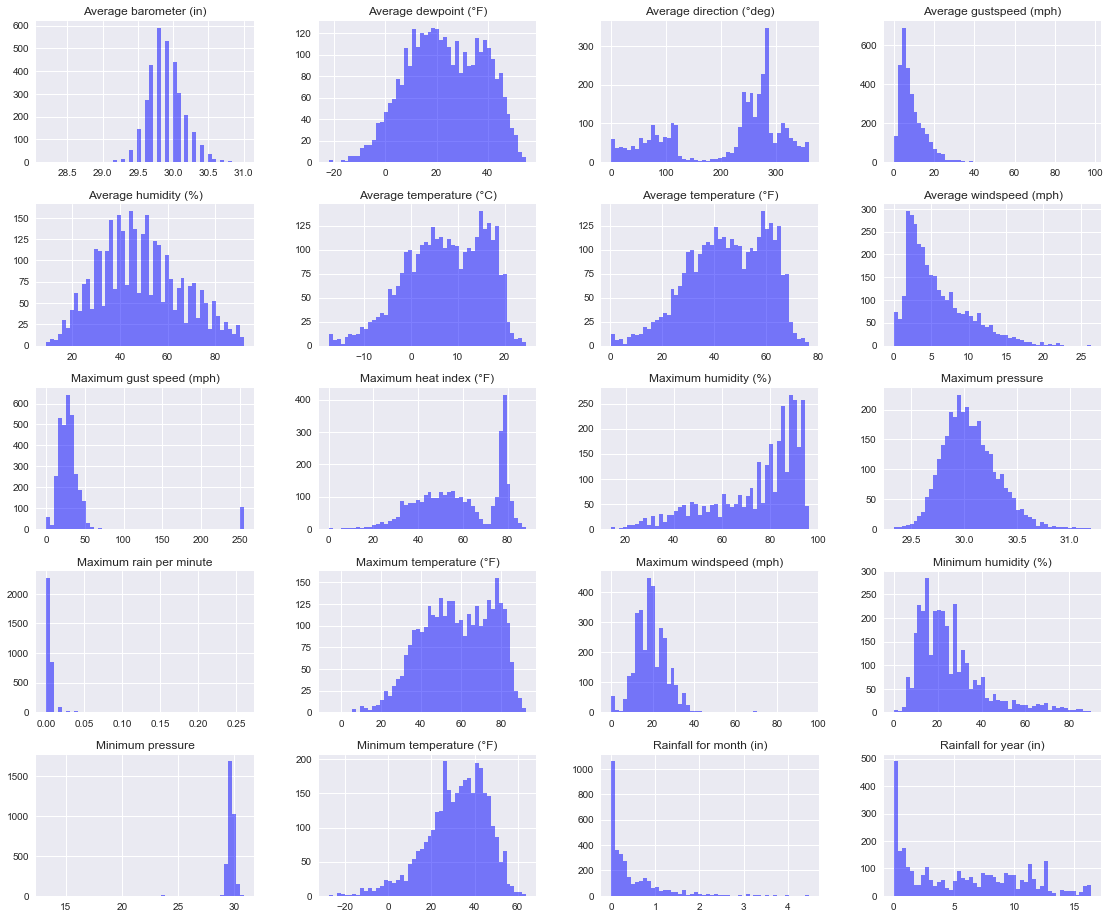

In [22]:
df.hist(color='blue', alpha=0.5, bins=50,figsize=(17,15))
plt.style.use("fivethirtyeight")
plt.show()

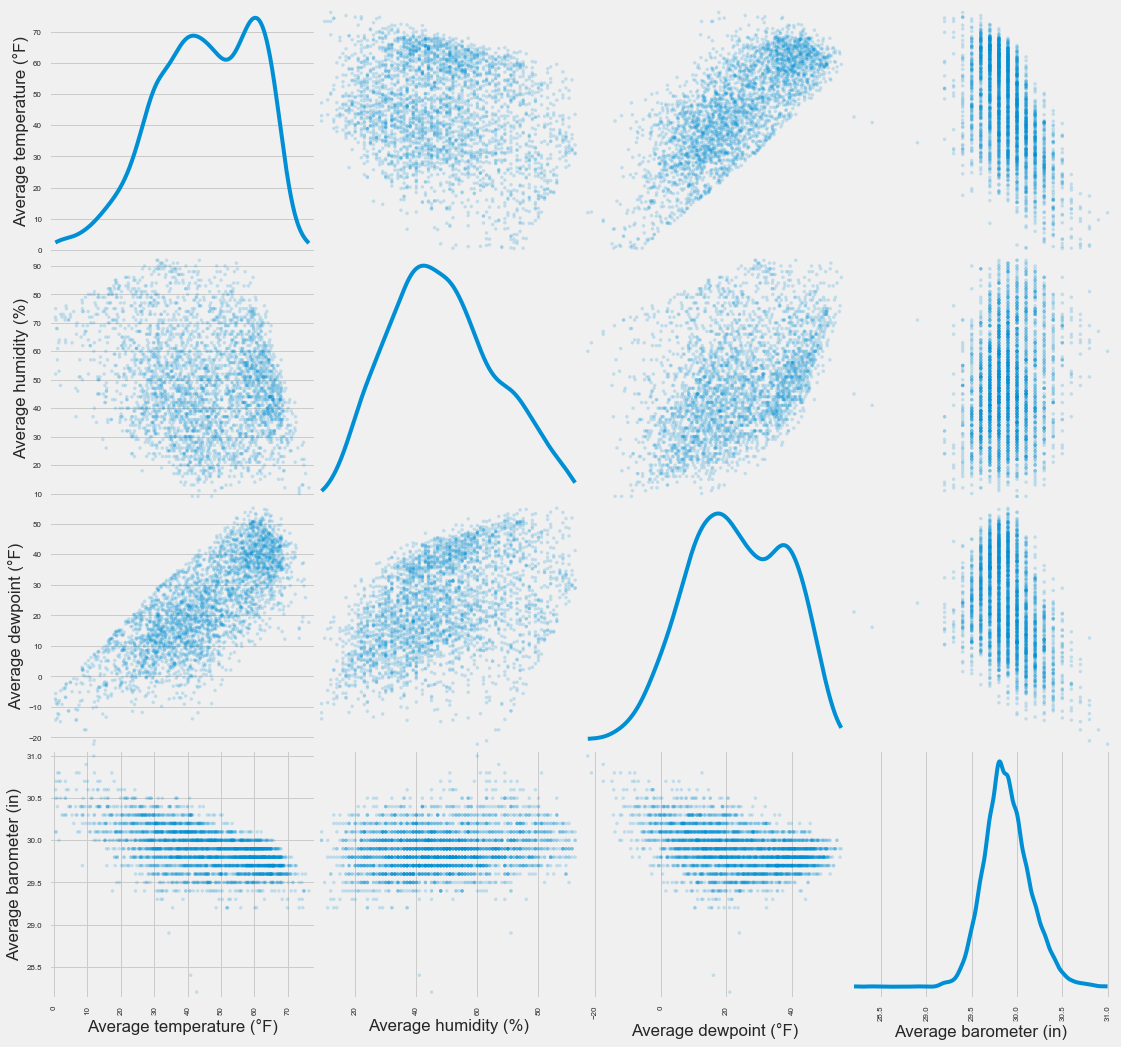

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.iloc[:,:4], alpha=0.2, figsize=(17,17), diagonal='kde')
# plt.style.use("dark_background")
plt.show()